Упражнение 5.1. Найти уравнение плоскости, проходящей через точки (1,1,2), (2,4,7) и (3,5,1) <br>(в функции Plane необходимо задать три точки). Сделать проверку, используя пример 1.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from matplotlib import cm

b = sp.Plane((1,1,2), (2,4,7), (3,5,1))
b1 = sp.Plane(sp.Point(1,1,2), sp.Point(2,4,7), sp.Point(3,5,1))

print(b.equation())
if b1 == b:
    print("Верно")

-23*x + 11*y - 2*z + 16
Верно


Упражнение 5.2. Найти уравнение плоскости, проходящей через точки (4,2,3), (2,0,1) и перпендикулярной плоскости x+2y+3z+4=0.<br> Проверить ортогональность нормальных векторов полученных плоскостей.


In [42]:
x, y, z = sp.symbols('x y z')

func = x + 2*y + 3*z + 4

y0 = 0
z0 = 1

n = (1, 2, 3)

p0 = (4, 2, 3)
p1 = (2, 0, 1)

x0 = sp.solve(func.subs([(y, y0), (z, z0)]), x)[0].evalf()

# Строим перпенд. плоскость по нормали и точке
per_plane = sp.Plane((x0, y0, z0), n)

# Строим исходную плоскость
plane = per_plane.perpendicular_plane(p0, p1)

# Создаем векторы нормалей
n0 = np.asarray(per_plane.normal_vector)
n1 = np.asarray(plane.normal_vector)

if n0.dot(n1) == 0:
  print('Векторы нормалей ортогональны, так как скалярное произведение равно нулю')

print(f'Уравнение плоскости: {plane.equation()} = 0')

Векторы нормалей ортогональны, так как скалярное произведение равно нулю
Уравнение плоскости: -2*x + 4*y - 2*z + 6 = 0


Упражнение 5.3. Найти расстояние от точки (1,2,3) до плоскости x+y+z-3=0.

In [49]:
x, y, z = sp.symbols('x y z')

func = x + y + z - 3

y0 = 0
z0 = 0

n = (1, 1, 1)

p0 = sp.Point(1, 2, 3)

x0 = sp.solve(func.subs([(y, y0), (z, z0)]), x)[0].evalf()

plane = sp.Plane((x0, y0, z0), n)

print(f'Расстояние: {plane.distance(p0)}')

Расстояние: sqrt(3)


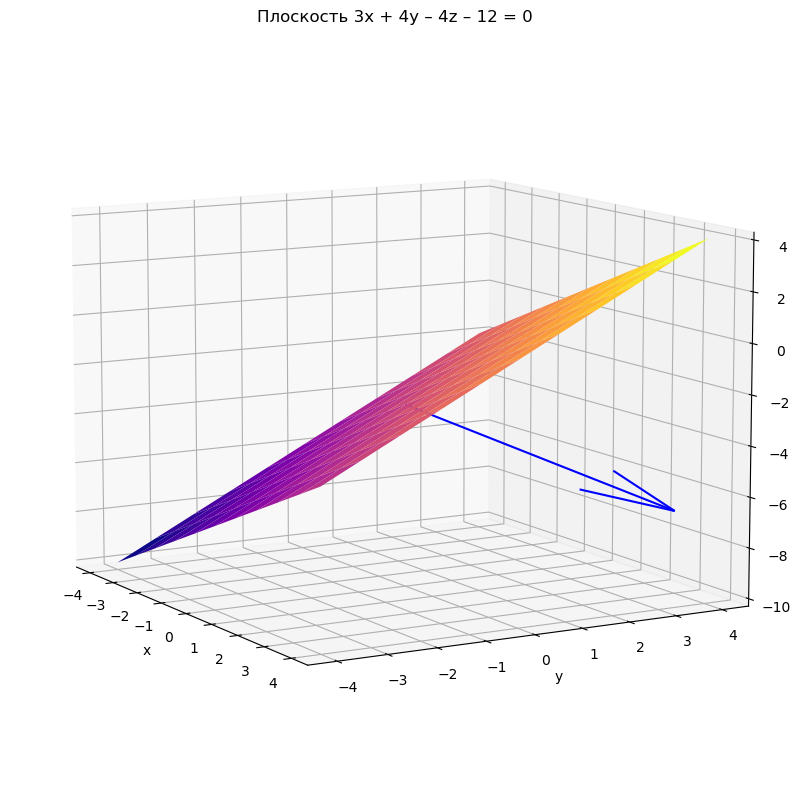

In [50]:
# Пример построения трехмерного графика
# параметры плоскости 3x+4y-4z-12=0
A = 3; B = 4; C = -4; D = -12

f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

p = np.array([0, 0, - 3]) # точка на плоскости

v = np.array([3, 4, -4]) # вектор нормали

ax.quiver(*p, *v, color='blue') # строим вектор нормали

z = f(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=10, cstride=10, cmap=cm.plasma) # строим плоскость

plt.xlabel('x')
plt.ylabel('y')
plt.title('Плоскость 3x + 4y – 4z – 12 = 0')

ax.view_init(10, -30)
plt.show()


Упражнение 5.4. Построить плоскость, проходящую через точку М(1,-1,-3) и имеющую нормальный вектор n(2,-3,5).<br> Найти расстояние от начала координат до данной плоскости. Вывести в заголовок графика общее уравнение плоскости.<br> Изобразить нормальный вектор и данную точку.

Уравнение плоскости: 2*x - 3*y + 5*z - 20 = 0
Расстояние от начала координат: 10*sqrt(38)/19


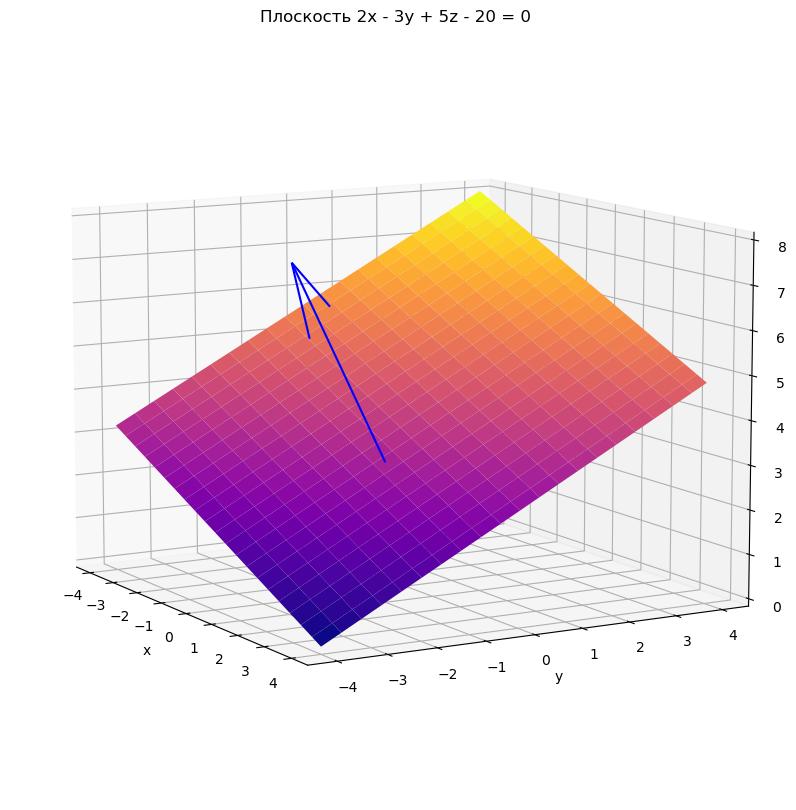

In [74]:
x, y, z = sp.symbols('x y z')

n = (2, -3, 5)
M = sp.Point(1, -1, 3)

plane = sp.Plane(M, n)

dist_0 = plane.distance(sp.Point(0, 0, 0))

plane = plane.equation(x, y, z)

print(f'Уравнение плоскости: {plane} = 0')
print(f'Расстояние от начала координат: {dist_0}')

A = plane.coeff(x, 1)
B = plane.coeff(y, 1)
C = plane.coeff(z, 1)
D = plane.subs([(x, 0), (y, 0), (z, 0)])

f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

p = np.asarray(M) # точка на плоскости

v = np.asarray(n) # вектор нормали

ax.quiver(*p, *v, color='blue') # строим вектор нормали

z = f(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.plasma) # строим плоскость

plt.xlabel('x')
plt.ylabel('y')
plt.title('Плоскость 2x - 3y + 5z - 20 = 0')

ax.view_init(10, -30)
plt.show()

Упражнение 5.5. Построить плоскость, проходящую через точку М(2,3,-4) и параллельно векторам a(-3,2,-1) и b(0,3,1).<br> Найти расстояние от точки N(-3,1,3)  до данной плоскости. <br>Вывести в заголовок графика общее уравнение плоскости.<br> Изобразить нормальный вектор и данные точки. Указать координаты нормального вектора.

Уравнение плоскости: 5*x + 3*y - 9*z - 55 = 0
Расстояние от точки N: 94*sqrt(115)/115


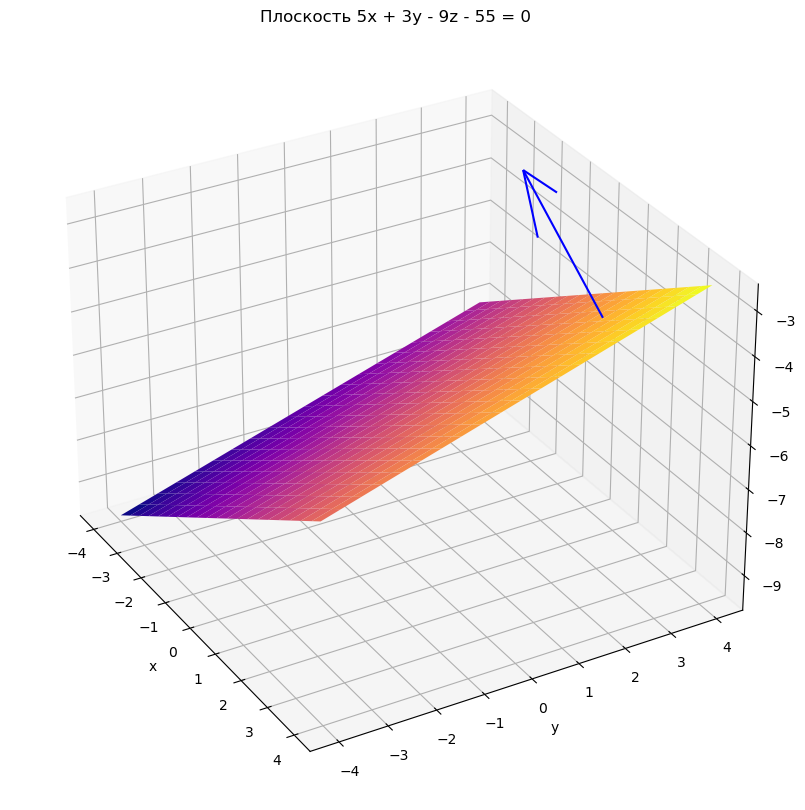

In [89]:
x, y, z = sp.symbols('x y z')

M = sp.Point(2, 3, -4)

M1 = np.array([x - M[0], y - M[1], z - M[2]])
a = np.array([-3, 2, -1])
b = np.array([0, 3, 1])

N = sp.Point(-3, 1, 3)

# уравнение плоскости, проходящей через заданную точку
# и компланарной двум неколлинеарным векторам:
matrix = sp.Matrix([M1, a, b])
plane_eq = sp.det(matrix)
print(f'Уравнение плоскости: {plane_eq} = 0')

A = plane_eq.coeff(x, 1)
B = plane_eq.coeff(y, 1)
C = plane_eq.coeff(z, 1)
D = plane_eq.subs([(x, 0), (y, 0), (z, 0)])

plane = sp.Plane(M, (A, B, C))
print(f'Расстояние от точки N: {plane.distance(N)}')

# ______________
# Отрисовка
# ______________
f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

p = np.asarray(M) # точка на плоскости

v = np.asarray(n) # вектор нормали

ax.quiver(*p, *v, color='blue') # строим вектор нормали

z = f(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.plasma) # строим плоскость

plt.xlabel('x')
plt.ylabel('y')
plt.title('Плоскость 5x + 3y - 9z - 55 = 0')

ax.view_init(30, -30)
plt.show()

Упражнение 5.6. Найти уравнение прямой, проходящей через точку (9,8,7) перпендикулярно плоскости 2(x-1)+4(y-4)+6(z-6)=0.<br>
Найти векторное произведение нормалей полученных плоскостей. Как оно связано с уравнением плоскости?	